In [1]:
import sys,os
import numpy as np
import tensorflow as tf
#import matplotlib
#matplotlib.use('TkAgg')
#%matplotlib qt

import matplotlib.pyplot as plt
import time
#%matplotlib inline
from scipy.signal import savgol_filter


/Users/jannisborn/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:


def plot_pca(n_comp=2, mode='input', plot=True):
    """
    PCA dimensionality reduction of the bLSTM's weight vectors. Plots weight vectors on first 2 eigenvectors.

    Parameters:
    -------------
    N_COMP 		{int} number of PCs to keep. Use 2 if plot=True, can be anything if called from plot_tsne for the sake of preprocessing
    MODE 		{str} choose from {'input','output'} depending on whether the input or output embedding vectors should be plotted
    PLOT 		{bool} to decide whether the plots should be displayed and saved (or the pca should just be computed, as preprocessing for tSNE)

    Returns:
    -------------
    PCS			{np.array} embedding vectors projected at the first 2 pcs. Shape: input_dict_size x 2

    """
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    phon_dict = {'t': 1, 'k': 2, 'I': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, '@': 8, 'E': 9, '#': 10, '|': 11, 'i': 12, 'Y': 13, 'l': 14, 'n': 15, 'f': 16, ':': 17, ' ': 18, 'U': 19, 'd': 20, 'u': 21, 'h': 22, 'S': 23, 'r': 24, 'v': 25, 'y': 26, 'o': 27, '/': 28, 'N': 29, 'p': 30, 'a': 31, 'x': 32, 'O': 33, 'z': 34, '+': 35, 'm': 36, 'b': 37, '<GO>': 38, '<PAD>': 39}
    word_dict = {'c': 1, 't': 2, 'k': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, 'i': 8, 'l': 9, 'n': 10, 'f': 11, 'q': 12, ' ': 13, 'd': 14, 'u': 15, 'w': 16, 'h': 17, 'r': 18, 'v': 19, 'y': 20, 'o': 21, 'p': 22, 'a': 23, 'x': 24, 'z': 25, 'm': 26, 'b': 27, '<GO>': 28, '<PAD>': 29}

    word_rev = dict(zip(word_dict.values(),word_dict.keys()))
    phon_rev = dict(zip(phon_dict.values(), phon_dict.keys()))
    
    path = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/celex/'

    ep = 250
    
    
    #var = 'writing/encoding_write/enc_embedding'
    var = 'writing/decoding_write/dec_embedding'
    #var = 'reading/encoding_read/enc_embedding'
    #var = 'reading/decoding_read/dec_embedding'
    
    dic = word_rev
    #dic = phon_rev
    
    ling = 'orthographic'
    #ling = 'phonetic'
    
    model = 'write'
    #model = 'read'
    
    ide =  'normal_run_7/'
    #ide =  'lds_run_12/'

    with tf.Session() as sess:

        #saver = tf.train.Saver(tf.global_variables())
        #saver.restore(sess,tf.train.latest_checkpoint(self.path))
        saver = tf.train.import_meta_graph(path+ide+'my_test_model-'+str(ep)+'.meta')
        saver.restore(sess,tf.train.latest_checkpoint(path+ide+'./'))

        variables_names = [v.name for v in tf.trainable_variables()]
        values = sess.run(variables_names)





        for k, v in zip(variables_names, values):
            if var in k:
            #print("Variable: ", k)
            #print("Shape: ", v.shape)
            #print(v)
            #print()

                weight_vectors = v
        print(weight_vectors.shape)
        print(len(dic))

        """
        if mode=='input':
        weight_vectors = self.net.input_embedding.eval()
        dic = dict(zip(self.input_dict.values(), self.input_dict.keys()))
        ling = 'phonetic' if args.task == 'write' else 'orthografic'
        elif mode == 'output':
        weight_vectors = self.net.output_embedding.eval()
        dic = dict(zip(self.output_dict.values(), self.output_dict.keys()))
        ling = 'orthografic' if args.task == 'write' else 'phonetic'
        else:
        raise ValueError("Specify mode as either 'input' or 'output'." )
        """

    pca = PCA(n_components=n_comp)
    pcs = pca.fit_transform(weight_vectors)

    print("The explained variance of the first", n_comp, 'PCs is (in %):', np.round(100*np.sum(pca.explained_variance_ratio_),3))    


    if plot:


        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('Projection of the '+ling+' vectors on the first 2 PCs.', fontsize = 20)
        ax.scatter(pcs[1:,0], pcs[1:,1],s=2)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        print(len(pcs))
        for k in range(1,len(pcs)):
            # in output dict 0 is not used as key
            # will be obsolete after proper retraining
            #if mode=='output' and k<28:

            ax.annotate(dic[k],(pcs[k,0], pcs[k,1]),size=14)  
            #else:
            #	ax.annotate(dic[k],(pcs[k,0], pcs[k,1]))

        plt.savefig("childlex/"+ide+"PCA_"+model+'_'+ling+"_Results.pdf")

        np.save("childlex/"+ide+"PCA_"+model+'_'+ling+"_Results", pcs)

    else:

        return pcs
    
    
    
 

INFO:tensorflow:Restoring parameters from /Users/jannisborn/Desktop/LDS_Data/TrainedModels/celex/normal_run_7/./my_test_model-499
(30, 96)
29
The explained variance of the first 2 PCs is (in %): 16.586
30


FileNotFoundError: [Errno 2] No such file or directory: 'childlex/normal_run_7/PCA_write_orthographic_Results.pdf'

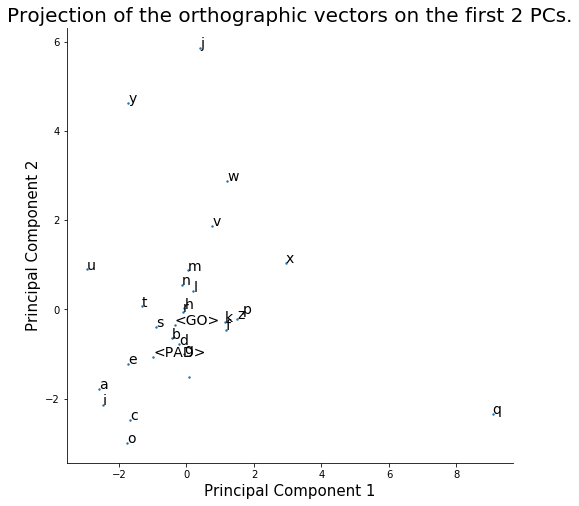

In [4]:
plot_pca()

In [ ]:
# normal, write, enc_embedding: similar vowels cluster: u and U (put, soon), e and E
# normal, write, dec_embedding: vowels cluster! and letters with plosive sounds cluster (pbtd)
# normal, read, enc_embedding: not so strong results
# normal, read, dec_embedding: not so strong results

# LDS after 250 epochs
# lds, write, enc_embedding: maybe cluster a bit less..
# lds, write, dec_embedding: vowels still cluster ...

# -> SHOW LdS PCA embedding plots!


In [61]:
   
def plot_tsne(perplexity=10, steps=5000, lr=10, init='random', angle=0.5, mode='input', pca=None):
    """
    t-SNE dimensionality reduction of the bLSTM's weight vectors.

    Parameters:
    ------------
    PERPLEXITY 	{int}, tunable hyperparameter, from [5,50] says author. Higher -> More attention to global aspects of data. 
                    More samples -> Higher perplexity, perplexity should always < num_samples (default=30)
    STEPS 		{int}, tunable hyperparameter, amount of iterations, (default=100)
    LR 			{int}, tunable hyperparameter. If too high -> data is circular and equidistant(!) in embedded space. 
                    If too low -> points compressed in clouds
    INIT 		{str}, choose from {'random', 'pca'}, the initialization of the embedding space (default=random)
    ANGLE 		{float}, from [0.0, 1.0], trade-off between accuracy (0.0) and speed (1.0) - default=0.5
    MODE 		{str} choose from {'input','output'} depending on whether the input or output embedding vectors should be plotted
    PCA 		{None,int} None per default, if integer is given, data is preprocessed with principal component analysis and 
                    first PCA PCs are kept.		

    About t-SNE:
        1)		Repeated runs with the same data and hyperparameters give different results
        2)		Cluster sizes usually do not mean anything
        3) 		Distances between clusters may not mean anything

    """

    from sklearn.manifold import TSNE 
    
    
    phon_dict = {'t': 1, 'k': 2, 'I': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, '@': 8, 'E': 9, '#': 10, '|': 11, 'i': 12, 'Y': 13, 'l': 14, 'n': 15, 'f': 16, ':': 17, ' ': 18, 'U': 19, 'd': 20, 'u': 21, 'h': 22, 'S': 23, 'r': 24, 'v': 25, 'y': 26, 'o': 27, '/': 28, 'N': 29, 'p': 30, 'a': 31, 'x': 32, 'O': 33, 'z': 34, '+': 35, 'm': 36, 'b': 37, '<GO>': 38, '<PAD>': 39}
    word_dict = {'c': 1, 't': 2, 'k': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, 'i': 8, 'l': 9, 'n': 10, 'f': 11, 'q': 12, ' ': 13, 'd': 14, 'u': 15, 'w': 16, 'h': 17, 'r': 18, 'v': 19, 'y': 20, 'o': 21, 'p': 22, 'a': 23, 'x': 24, 'z': 25, 'm': 26, 'b': 27, '<GO>': 28, '<PAD>': 29}

    word_rev = dict(zip(word_dict.values(),word_dict.keys()))
    phon_rev = dict(zip(phon_dict.values(), phon_dict.keys()))
    
    path = '/Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/'

    ep = 499
    
    
    #var = 'writing/encoding_write/enc_embedding'
    var = 'writing/decoding_write/dec_embedding'
    #var = 'reading/encoding_read/enc_embedding'
    #var = 'reading/decoding_read/dec_embedding'
    
    dic = word_rev
    #dic = phon_rev
    
    ling = 'orthographic'
    #ling = 'phonetic'
    
    model = 'write'
    #model = 'read'
    
    ide =  'normal_run_13/'
    #ide =  'lds_run_12/'

    with tf.Session() as sess:

        saver = tf.train.import_meta_graph(path+ide+'my_test_model-'+str(ep)+'.meta')
        saver.restore(sess,tf.train.latest_checkpoint(path+ide+'./'))

        variables_names = [v.name for v in tf.trainable_variables()]
        values = sess.run(variables_names)
        
        for k, v in zip(variables_names, values):
            if var in k:
            #print("Variable: ", k)
            #print("Shape: ", v.shape)
            #print(v)

               weight_vectors = v


        if perplexity >= weight_vectors.shape[0]:
            raise ValueError("Please make sure the perplexity argument is smaller than the number of data points.")
        


        if pca is not None:
            # Preprocess via PCA
            weight_vectors = plot_pca(n_comp=pca, mode=mode, plot=False)

        t = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=steps, learning_rate=lr, init=init, angle=angle)
        tsne_results = tsne.fit_transform(weight_vectors)
        print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-t))


        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('x-tsne', fontsize = 15)
        ax.set_ylabel('y-tsne', fontsize = 15)
        ax.set_title('tSNE '+ling+' vectors', fontsize = 20)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.scatter(tsne_results[:,0], tsne_results[:,1],s=2)
        print(tsne_results.shape)
        for k in range(1,len(tsne_results)):
            # in output dict 0 is not used as key
            # will be obsolete after proper retraining
                ax.annotate(dic[k],(tsne_results[k,0], tsne_results[k,1]),size=16)  

        filename = 'childlex/'+ide+"t_SNE_"+model+'_'+ling+'_perp='+str(perplexity)+'step='+str(steps)+'lr='+str(lr)+'ang='+str(angle)

        plt.savefig(filename + '.pdf')
        np.save(filename, tsne_results)



INFO:tensorflow:Restoring parameters from /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/./my_test_model-499
[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 3.119366
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.585945
[t-SNE] Error after 2250 iterations: 0.806195
t-SNE done! Time elapsed: 0.6988999843597412 seconds
(30, 2)


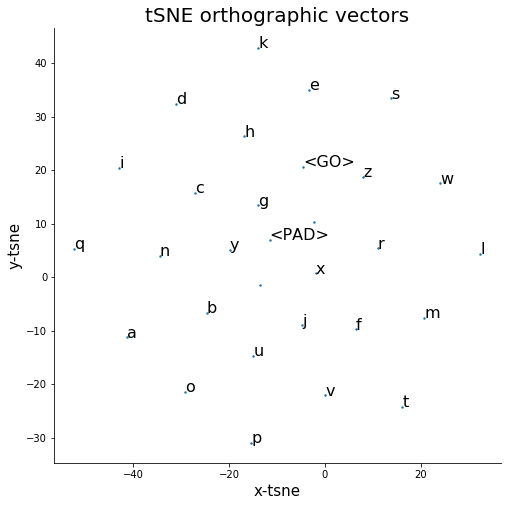

In [62]:
plot_tsne()

INFO:tensorflow:Restoring parameters from /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/./my_test_model-499
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 2.879913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.308167
[t-SNE] Error after 1050 iterations: 1.111119
t-SNE done! Time elapsed: 0.34786009788513184 seconds
(30, 2)


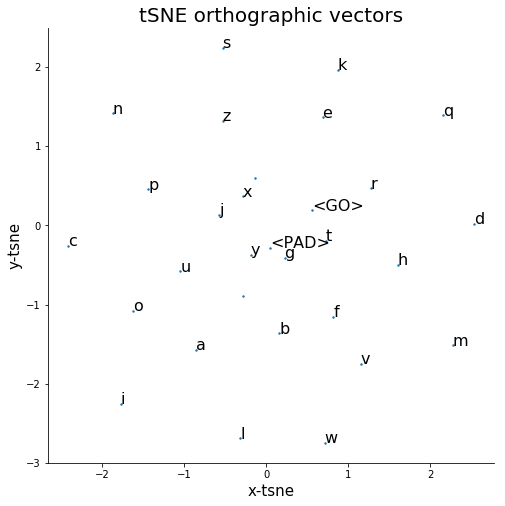

In [63]:
plot_tsne(perplexity=5,lr=1)

### READ IN MODEL AND DO A PREDICTION


In [2]:
path = '/Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/'

ep = 499

ide =  'normal_run_13/'

with tf.Session() as sess:

    saver = tf.train.import_meta_graph(path+ide+'my_test_model-'+str(ep)+'.meta')
    saver.restore(sess,tf.train.latest_checkpoint(path+ide+'./'))


OSError: File /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/my_test_model-499.meta does not exist.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/celex_all/normal_run_0/metrics.npz'

d = np.load(p)


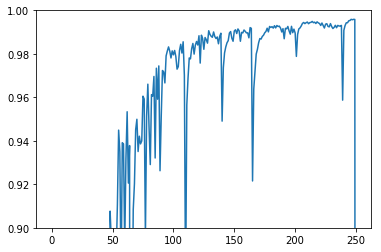

In [28]:
root = os.path.expanduser("~")+'/Desktop/LDS_Data/'
path = root + 'TrainedModels/childlex/normal_run_0'
epochs = 249
task = 'write'
mode = 'input'

with tf.Session() as sess:

			# Restore model
			saver = tf.train.import_meta_graph(path+'/my_test_model-'+str(epochs)+'.meta')
			saver.restore(sess,tf.train.latest_checkpoint(path+'/./'))
			graph = tf.get_default_graph()

			variable_path = self.model_name + '/encoding_' + self.task + '/enc_embedding:0'


			# Load data and perform PCA
			weight_vectors = sess.run(graph.get_tensor_by_name(variable_path))

0
